# Задание на лабораторную работу №2. Pandas и основы python
## Общее задание
1. Сгенерировать с использованием библиотеки pandas csv файл, содержащий 3 столбца: $x_1$, $x_2$, $y$ (> 400 строк, генерация с использованием функции linspace). Вид функции определяется вариантом (диапазон выбирается студентом).
2. Открыть файл с использованием библиотеки pandas и построить графики: $y(x_1)$ ($x_2$ - константа), $y(x_2)$  ($x_1$ - константа). Графики необходимо построить с использованием matplotlib (для функции y отобразить точки на графике). 
3. Вывести для каждого столбца $(x_1, x_2, y)$: среднее, минимальное и максимальное значения.
4. Сохранить в новый csv файл те строки, для которых выполняется условие: $x_1$ меньше среднее $x_1$ или $x_2$ меньше среднее $x_2$
5. С использованием mplot3D построить 3D график функции $y(x_1, x_2)$ в отдельном окне.

## Вариант

15. $y = tan(x_1) * ctg(x_2)$



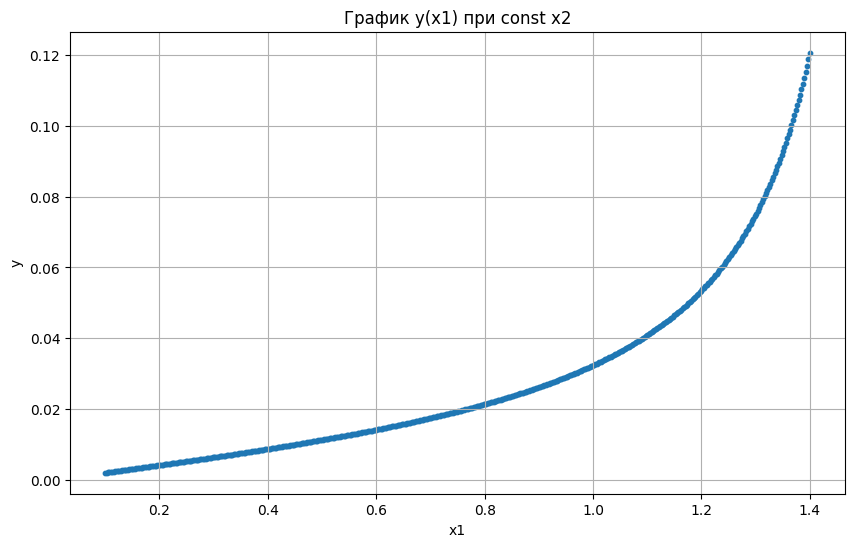

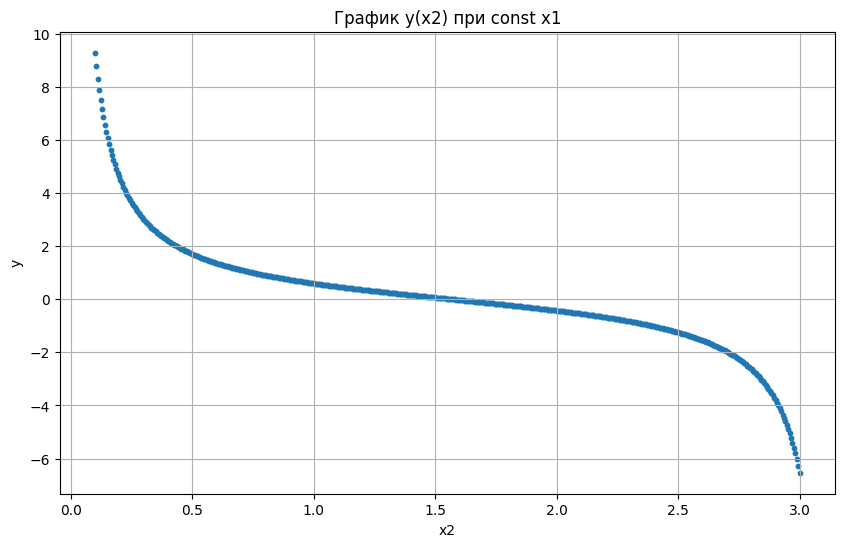

x1: среднее=0.75, min=0.10, max=1.40
x2: среднее=1.55, min=0.10, max=3.00
y: среднее=-2.19, min=-40.67, max=1.00
Отфильтровано строк: 250


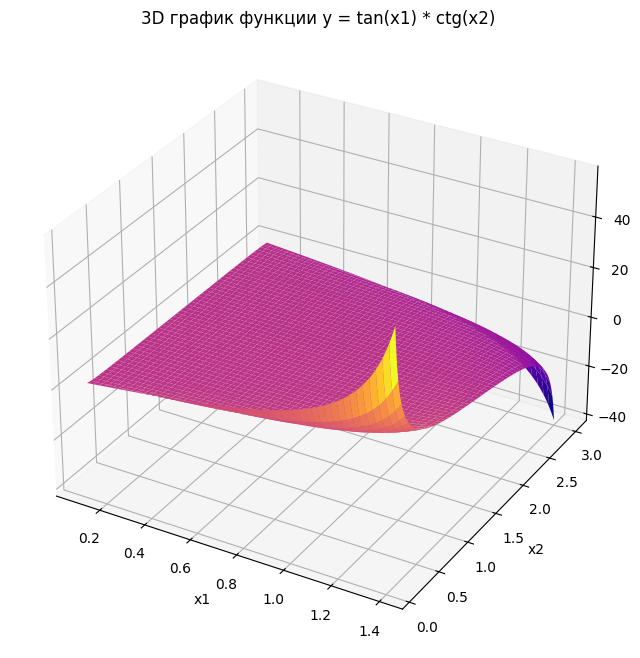

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



x1 = np.linspace(0.1, 1.4, 500)  
x2 = np.linspace(0.1, 3.0, 500)  


data = pd.DataFrame({
    "x1": x1,
    "x2": x2,
    "y": np.tan(x1) * (np.cos(x2) / np.sin(x2))
})


data.to_csv("data_variant15.csv", index=False)



x2_const = data["x2"].mean()
x1_const = data["x1"].mean()

# График y(x1) при const x2
plt.figure(figsize=(10,6))
plt.scatter(data["x1"], np.tan(data["x1"]) * (np.cos(x2_const) / np.sin(x2_const)), s=10)
plt.title("График y(x1) при const x2")
plt.xlabel("x1")
plt.ylabel("y")
plt.grid(True)
plt.show()

# График y(x2) при const x1 
plt.figure(figsize=(10,6))
plt.scatter(data["x2"], np.tan(x1_const) * (np.cos(data["x2"]) / np.sin(data["x2"])), s=10)
plt.title("График y(x2) при const x1")
plt.xlabel("x2")
plt.ylabel("y")
plt.grid(True)
plt.show()


for col in ["x1", "x2", "y"]:
    print(f"{col}: среднее={data[col].mean():.2f}, min={data[col].min():.2f}, max={data[col].max():.2f}")


mean_x1 = data["x1"].mean()
mean_x2 = data["x2"].mean()
filtered_data = data[(data["x1"] < mean_x1) | (data["x2"] < mean_x2)]
filtered_data.to_csv("filtered_data.csv", index=False)
print(f"Отфильтровано строк: {len(filtered_data)}")



X1, X2 = np.meshgrid(x1, x2)
Y = np.tan(X1) * (np.cos(X2) / np.sin(X2))

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection="3d")
surf = ax.plot_surface(X1, X2, Y, cmap="plasma")
ax.set_title("3D график функции y = tan(x1) * ctg(x2)")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.show()